In [1]:
# Import libraries/dependencie

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, balanced_accuracy_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

warnings.filterwarnings('ignore')
print('done importing')

done importing


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("../Resources/diabetes_2021_health_indicators_BRFSS2021.csv")
df = pd.read_csv(file_path)
df

,Diabetes,Pre-Diabetic,Afford Costs,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,...,Gender,Age,Overweight/Obese,Education,Income,Smoker,Binge Drinker,Heavy Drinker,Fruit>1/Day,Veggies>1/Day
0,0,0,0,0,0,0,0,0,0,1,...,1,6,0,2,3,3,0,0,1,1
1,1,0,0,1,1,0,0,1,0,0,...,1,6,1,2,2,4,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,...,1,5,1,2,5,4,1,0,1,1
3,0,0,0,1,1,0,0,0,0,1,...,0,6,0,3,4,3,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,6,1,2,5,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242886,1,0,0,1,1,1,0,0,0,0,...,0,6,0,1,2,4,1,0,1,1
242887,0,0,1,1,0,1,0,0,0,1,...,1,2,0,2,3,3,0,0,1,1
242888,0,0,0,1,1,1,0,0,0,0,...,0,4,1,4,6,4,0,0,1,1
242889,0,0,0,1,1,1,0,0,0,0,...,0,6,0,2,4,4,0,0,1,1


## Defining the dataset

#### For Maching Learning, our target is "Diabetes", and out features (independent variables) include the top features identified in our feature engineering and selection:

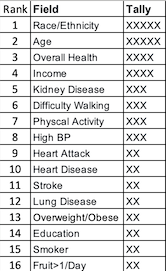


**Target**
Diabetes (Diagnosed with Diabetes) 0 = No  1 = Yes

**Independent Variables**
* Heart Attack (Diagnosed with Heart Attack) 0 = No  1 = Yes
* Heart Disease (Diagnosed with Angina or Coronary Heart Disease) 0 = No  1 = Yes
* Stroke (Diagnosed with a Stroke) 0 = No  1 = Yes
* Lung Disease (Diagnosed with C.O.P.D. emphysema or chronic bronchitis) 0 = No  1 = Yes
* Kidney Disease (Diagnosed with Kidney Disease) 0 = No  1 = Yes
* Difficulty Walking (Difficulty Walking or Climbing Stairs) 1 = Yes 2 = No
* Overall Health (Adults with good or better health) 1 = Good or Better Health   2 = Fair or Poor Health 
* Race/Ethnicity
    1 = White
    2 = Black
    3 = Asian
    4 = American Indian/Alaskan Native
    5 = Hispanic
    6 = Other
* Physcal Activity 0 = No  1 = Yes
* High BP (High Blood Pressure) 0 = No  1 = Yes
* Gender 1 = Male 2 = Female
* Age
    1 = Age 18 to 24 
    2 = Age 25 to 34
    3 = Age 35 to 44 
    4 = Age 45 to 54 
    5 = Age 55 to 64 
    6 = Age 65 or older
* Overweight/Obese  0 = No  1 = Yes
* Education (Level of education completed)
    1 = Did not graduate High School 
    2 = Graduated High School 
    3 = Attended College or Technical School
    4 = Graduated from College or Technical School 
* Income
    1 = Less than $15,000 
    2 = $15,000 to < $25,000 
    3 = $25,000 to < $35,000 
    4 = $35,000 to < $50,000 
    5 = $50,000 to < $100,000 
    6 = $100,000 to < $200,000 
    7 = $200,000 or more
* Smoker
    1 = Current smoker -now smokes every day 
    2 = Current smoker -now smokes some days 
    3 = Former smoker 
    4 = Never smoked 
* Fruit>1/Day (Consume Fruit 1 or more times per day) 0 = No  1 = Yes


In [3]:
diabetes_df = df[['Diabetes', 'Afford Costs', 'Heart Attack', 'Heart Disease',
       'Stroke', 'Lung Disease', 'Kidney Disease', 'Difficulty Walking',
       'Race/Ethnicity', 'Overall Health', 'Physical Activity','High BP', 'Gender', 
       'Age', 'Overweight/Obese', 'Income','Smoker', 'Fruit>1/Day']]
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242891 entries, 0 to 242890
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Diabetes            242891 non-null  int64
 1   Afford Costs        242891 non-null  int64
 2   Heart Attack        242891 non-null  int64
 3   Heart Disease       242891 non-null  int64
 4   Stroke              242891 non-null  int64
 5   Lung Disease        242891 non-null  int64
 6   Kidney Disease      242891 non-null  int64
 7   Difficulty Walking  242891 non-null  int64
 8   Race/Ethnicity      242891 non-null  int64
 9   Overall Health      242891 non-null  int64
 10  Physical Activity   242891 non-null  int64
 11  High BP             242891 non-null  int64
 12  Gender              242891 non-null  int64
 13  Age                 242891 non-null  int64
 14  Overweight/Obese    242891 non-null  int64
 15  Income              242891 non-null  int64
 16  Smoker              

#### Data Exploration

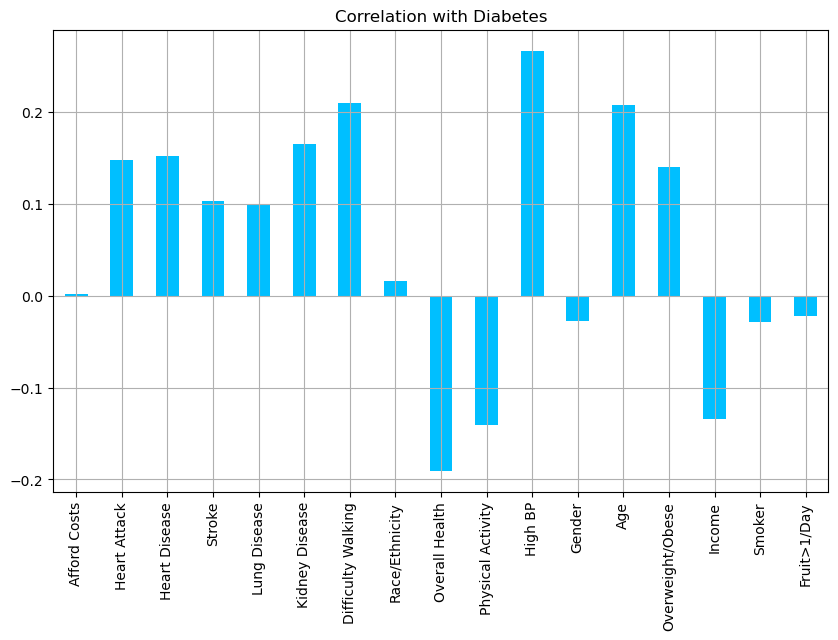

In [4]:
# Check correlation of other columns with diabetes column
diabetes_df.drop('Diabetes', axis=1).corrwith(diabetes_df.Diabetes).plot(kind='bar', grid=True, \
                                    figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue");

In [5]:
# Drop the variable with the lowest correlation: Afford Costs
diabetes_df.drop(['Afford Costs'], axis=1, inplace=True)
diabetes_df

,Diabetes,Heart Attack,Heart Disease,Stroke,Lung Disease,Kidney Disease,Difficulty Walking,Race/Ethnicity,Overall Health,Physical Activity,High BP,Gender,Age,Overweight/Obese,Income,Smoker,Fruit>1/Day
0,0,0,0,0,1,0,0,1,0,0,0,1,6,0,3,3,1
1,1,0,1,0,0,0,0,2,1,0,1,1,6,1,2,4,1
2,1,0,0,0,0,0,0,1,1,1,1,1,5,1,5,4,1
3,0,0,0,0,1,0,1,1,1,0,0,0,6,0,4,3,0
4,0,0,0,0,0,0,1,1,1,1,1,1,6,1,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242886,1,0,0,0,0,0,0,5,0,1,1,0,6,0,2,4,1
242887,0,0,0,0,1,0,0,2,1,1,1,1,2,0,3,3,1
242888,0,0,0,0,0,0,0,2,1,1,0,0,4,1,6,4,1
242889,0,0,0,0,0,0,0,2,1,1,1,0,6,0,4,4,1


In [6]:
diabetes_df.describe()

,Diabetes,Heart Attack,Heart Disease,Stroke,Lung Disease,Kidney Disease,Difficulty Walking,Race/Ethnicity,Overall Health,Physical Activity,High BP,Gender,Age,Overweight/Obese,Income,Smoker,Fruit>1/Day
count,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000,242891.000000
mean,0.131442,0.049936,0.053514,0.036593,0.075589,0.038968,0.147350,1.655150,0.856273,0.779123,0.396112,0.520320,4.406973,0.705600,4.449477,3.366156,0.614156
std,0.337883,0.217813,0.225056,0.187760,0.264341,0.193519,0.354455,1.418013,0.426337,0.414838,0.489089,0.499588,1.539065,0.455773,1.579502,0.929252,0.486795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,1.000000,5.000000,4.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,6.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,9.000000,1.000000,1.000000,1.000000,6.000000,1.000000,7.000000,4.000000,1.000000


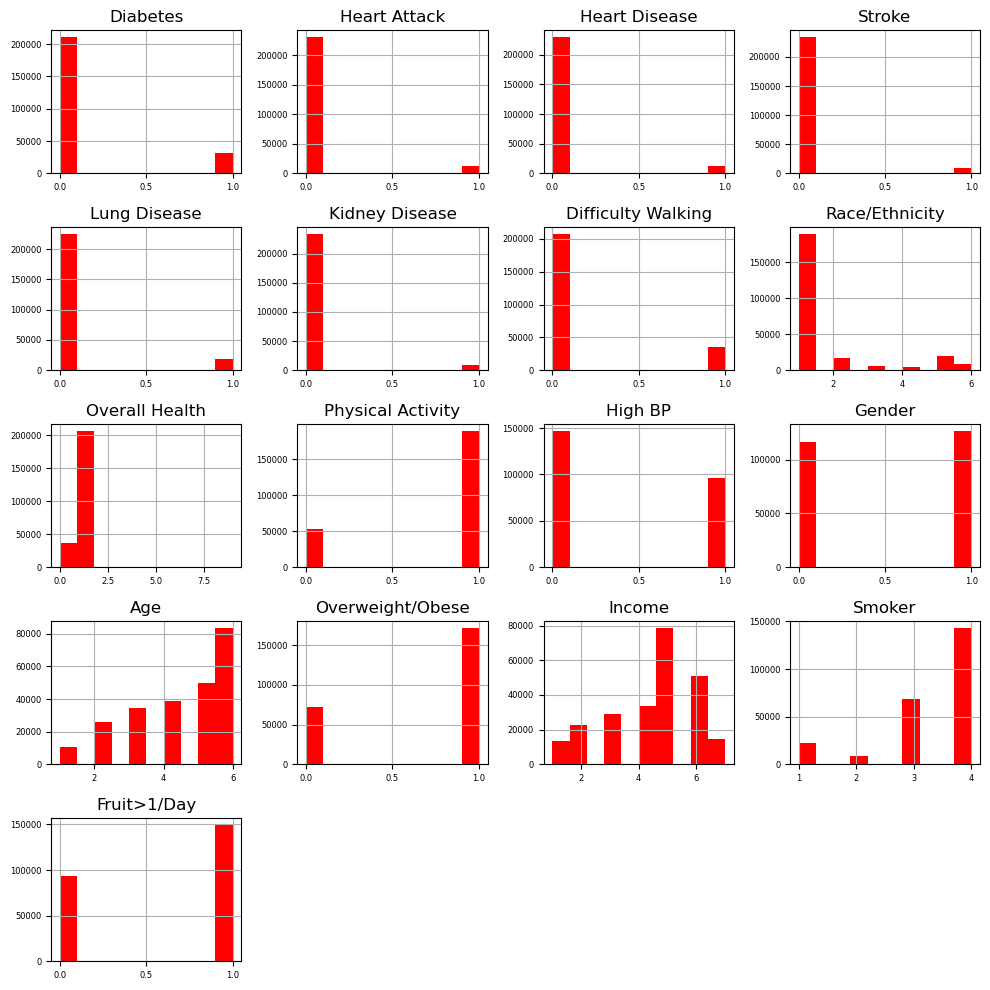

In [7]:
diabetes_df.hist(figsize=(10,10),color='red', xlabelsize=6, ylabelsize=6)
plt.tight_layout()

In [8]:
# Check skewness  https://www.kaggle.com/code/solafajobi/diabetes-perfect-prediction/notebook
# 'Race/Ethnicity', 'Age', 'Income','Smoker' are the only non-binary features in our DataFrame
diabetes_df_skew = diabetes_df[['Diabetes', 'Heart Attack', 'Heart Disease',
       'Stroke', 'Lung Disease', 'Kidney Disease', 'Difficulty Walking',
       'Race/Ethnicity', 'Overall Health', 'Physical Activity','High BP', 'Gender', 
       'Age', 'Overweight/Obese', 'Income','Smoker', 'Fruit>1/Day']]
skew = pd.DataFrame(diabetes_df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Diabetes,2.181589,True
Heart Attack,4.132604,True
Heart Disease,3.967812,True
Stroke,4.936219,True
Lung Disease,3.211114,True
Kidney Disease,4.764750,True
Difficulty Walking,1.989830,True
Race/Ethnicity,2.042405,True
Overall Health,4.496824,True
Physical Activity,-1.345707,False


### Scaling the data
Skewness refers to data distortion or symmetry/ asymmetry of data distribution. When your data is skewed, the value of the mean and the median is different. Skewness violates the normality assumption of some ML models, for example, linear regression. When you fit a linear regression model based on skewed data, the results of this model might be misleading. You can always apply other models that are immune to skewness like tree-based, however, it would limit your possibilities in trying other models.

Data scaling is a method for reducing the effect of data bias on predictions which is highly used in pre-processing step in any Machine Learning project. It can be applied to any type of prediction model

***StandardScaler*** is a fast and specialized algorithm for scaling data. It calculates the mean and standard deviation of the data set and normalizes it by subtracting the mean and dividing by standard deviation. Using StandardScaler is a common practice in ML projects if the data set follows a normal distribution.  ***MinMaxScaler*** is a simple and effective linear scaling function. It scales the data set between 0 and 1. In other words, the minimum and maximum values in the scaled data set are 0 and 1 respectively. MinMax Scaler is often used as an alternative to Standard Scaler if zero mean and unit variance want to be avoided. ***RobustScaler*** is a technique that uses median and quartiles to tackle the biases rooting from outliers. Instead of removing mean, RobustScaler removes median and scales the data according to the quantile range aka IQR: Interquartile Range.

**----------------------------------------------------------------------------------------------------------------------**

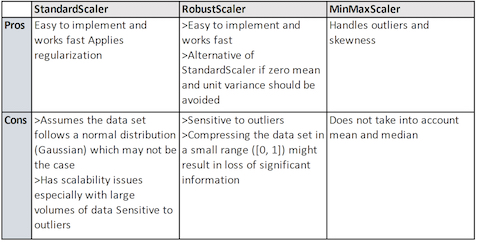

In [9]:
# We’ll use sklearn’s RobustScaler, StandardScaler, and MinMaxScaler to transform data
# We’ll also apply standard scaling to the same data. 
# Then we will compare performance of robust and standard scalers.

#Create a copy of the Datframce to test the scaling options
scaling_df = diabetes_df.copy()

# ROBUST SCALER
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(scaling_df)

# STANDARD SCALER
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(scaling_df)

# MINMAX SCALER
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(scaling_df)

# Create a DataFrame to compare all three scaled values
# Aggregrate functions: min, max, mean, median, range, standard deviation, variance, and interquartile range

# Create a table to show the results
scaled_values = pd.DataFrame({
    'Standard': standard_scaled_data.reshape(-1),
    'Robust': robust_scaled_data.reshape(-1),
    'MinMax': minmax_scaled_data.reshape(-1)})

# Input's interquartile range (distance between 75th and 25th percentiles)
def IQR(column): 
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

# Input's range (difference between maximum and minimum values)
# Range() is already a built-in function in Python, so I chose another name for our custom function (range_f)
def range_f(column):
    return column.max() - column.min()

# Create a list of our aggregate functions
stats_list = ['min', 'max', 
              range_f, # custom function 
              'mean', 'median',  'std',
              np.var, # numpy function
              IQR   # custom function 
]

summary_stats = scaled_values.agg(func=stats_list)
summary_stats.applymap('{:,.2f}'.format)

,Standard,Robust,MinMax
min,-2.55,-3.00,0.00
max,19.10,8.00,1.00
range_f,21.65,11.00,1.00
mean,0.00,-0.06,0.34
median,-0.23,0.00,0.00
std,1.00,0.63,0.44
var,1.00,0.40,0.20
IQR,0.95,0.00,1.00


#### Observations

After exploring the data, we observe the following:
* Our data set is largely binary, with some ordinal features
* Standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.
* The data set does not follow a normal distribution
* The standard scaler produces a much wider range of values than the other scalers, also confirmed by the variance, and standard deviation.
* Our data set shows several skewed features

## Model Building, Optimization, and Analysis

In [10]:
# Split our data into our features and target arrays
y = diabetes_df["Diabetes"]
X = diabetes_df.drop("Diabetes",axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (182168, 16) (182168,)
Test Set:  (60723, 16) (60723,)


####  Use MinMaxScaler to scale the training data (`X_train` and `y_train`).

In [11]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the training & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print("Train Set: ", X_train_scaled.shape)
print("Test Set: ", X_test_scaled.shape)

Train Set:  (182168, 16)
Test Set:  (60723, 16)


### Predict with Logistic Regression, Decision Tree, KNN and Random Forest


**Logistic Regression**: Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [12]:
#  Create a LogisticRegression Model
lr_classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Train the data
lr_classifier.fit(X_train_scaled, y_train)

# Validate the model using the test data...Score the model
print(f"Training Data Score: {lr_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8706853014799526
Testing Data Score: 0.8703950727072114


In [13]:
 # Make predications...Predict outcomes for test data set
lr_predictions = lr_classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": lr_predictions, "Actual": y_test})

,Prediction,Actual
202253,0,0
88064,0,0
229931,0,1
146972,0,0
60706,0,0
...,...,...
96194,0,0
135698,0,0
239226,0,0
95330,0,0


In [16]:
# Calculating the confusion matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
lr_cm_df = pd.DataFrame(
    lr_cm, index=["No Diabetes 0", "Diabetes 1"], 
    columns=["Predicted 0", "Predicted 1"]
    )

# Calculating the accuracy score
lr_acc_score = accuracy_score(y_test, lr_predictions)

# Displaying results
print("Confusion Matrix")
display(lr_cm_df)
print(f"Accuracy Score : {lr_acc_score}")
print("Classification Report")
print(classification_report(y_test, lr_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
No Diabetes 0,51891,850
Diabetes 1,7020,962


Accuracy Score : 0.8703950727072114
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     52741
           1       0.53      0.12      0.20      7982

    accuracy                           0.87     60723
   macro avg       0.71      0.55      0.56     60723
weighted avg       0.83      0.87      0.83     60723



While the precision, recall and f1-score are high for healthy individuals, those for individuals with diabetes are less than ideal.  Though the model accuracy is high (87%), it may be highly influenced by the fact that healthy individuals outnumber those with diabetes.  As a result, the false negatives (individuals misdiagnosed as healthy = 850) is unacceptably high.

**K Nearest Neighbors**: The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [19]:
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.819 total time=  43.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.810 total time=  43.3s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.813 total time=  43.3s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.812 total time=  43.7s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.812 total time=  43.5s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.819 total time=  44.1s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.810 total time=  44.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.813 total time=  43.9s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.812 total time=  44.6s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.812 total time=  44.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.842 total time= 1.0min
[CV 2/5] END ...n_neighbors=3, weights=distance;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [20]:
print(gridKNN.best_params_)

{'n_neighbors': 9, 'weights': 'uniform'}


In [40]:
# Make predications...Predict outcomes for test data set with the best parameter
knn_predictions_test = gridKNN.predict(X_test_scaled)
knn_predictions_train = gridKNN.predict(X_train_scaled)

In [22]:
# Calculating the confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions_test)
knn_cm_df = pd.DataFrame(
    knn_cm, index=["No Diabetes 0", "Diabetes 1"], 
    columns=["Predicted 0", "Predicted 1"]
    )

# Calculating the accuracy score
knn_acc_score = accuracy_score(y_test, knn_predictions_test)

# Displaying results
print("Confusion Matrix")
display(knn_cm_df)
print(f"Accuracy Score : {knn_acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_predictions_test))

Confusion Matrix


,Predicted 0,Predicted 1
No Diabetes 0,51168,1573
Diabetes 1,6803,1179


Accuracy Score : 0.8620621510794921
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     52741
           1       0.43      0.15      0.22      7982

    accuracy                           0.86     60723
   macro avg       0.66      0.56      0.57     60723
weighted avg       0.82      0.86      0.83     60723



KNN did not provide improvement in our accuracy or prediction of diabetes.  In fact, it did worse in generating significantly more false negatives (6803)!

**Decision Tree**: A decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. It makes predictions based on how a previous set of questions were answered.

In [34]:
# Creating the decision tree classifier instance
dt = DecisionTreeClassifier(random_state=42)

# Fitting the model
dt = dt.fit(X_train_scaled, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 29, 2),
                         'max_features': range(1, 17)})

In [35]:
dt_pred_test = gridDT.predict(X_test_scaled)
dt_pred_train = gridDT.predict(X_train_scaled)

In [39]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred_test)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
dt_acc_score = accuracy_score(y_test, dt_pred_test)

# Displaying results
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {dt_acc_score}")
print("Classification Report")
print(classification_report(y_test, dt_pred_test))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,52185,556
Actual 1,7282,700


Accuracy Score : 0.8709220558931542
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     52741
           1       0.56      0.09      0.15      7982

    accuracy                           0.87     60723
   macro avg       0.72      0.54      0.54     60723
weighted avg       0.84      0.87      0.83     60723



Our accuracy, precision, recall and f1-score are consistent with the prior models for non-diabetes diagnoses.  For diabetes diagnoses, our precision has improved in this model, but worsened in terms of the ability of a classifier to correctly find all positive instances.  Our false negatives again took a nose-dive with this model.

***Random Forest***: One of the most popular and commonly used algorithms by Data Scientists. Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks. In this tutorial, we will understand the working of random forest and implement random forest on a classification task.

In [41]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf = rf.fit(X_train_scaled, y_train)

# Making predictions using the testing data
rf_predictions = rf.predict(X_test_scaled)

In [42]:
# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
rf_acc_score = accuracy_score(y_test, rf_predictions)

# Displaying results
print("Confusion Matrix")
display(rf_cm_df)
print(f"Accuracy Score : {rf_acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50723,2018
Actual 1,6608,1374


Accuracy Score : 0.8579450949393146
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     52741
           1       0.41      0.17      0.24      7982

    accuracy                           0.86     60723
   macro avg       0.64      0.57      0.58     60723
weighted avg       0.82      0.86      0.83     60723



Random Forest provides a consistent result with earlier models, but does offer a slightly improved/reduced false negatives.